# Thresholding and Binarization

- thresholding/binarization
- adaptive thresholding
- SkImage Threshold Local

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [5]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["flickr", "weather", "gem"])
IMG_PATH   

'../../res/img/Cheetahs/03e4a856df44695a.jpg'

---
### Loading data

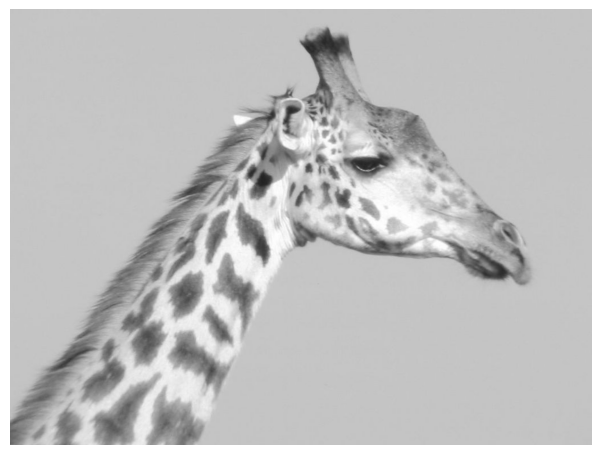

In [77]:
img = cv2.imread(IMG_PATH, 0)
imshow(img)

---
### Thresholding/Binarization

Methods:
```python
cv2.THRESH_BINARY  # Pixel intensity is set to max value if it is greater than threshold else set to 0
cv2.THRESH_BINARY_INV  # Inverted or Opposite case of cv2.THRESH_BINARY
cv2.THRESH_TRUNC  # Pixel intensity value is truncated to the threshold if it is greater than threshold
cv2.THRESH_TOZERO  # Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value
cv2.THRESH_TOZERO_INV  # Inverted or Opposite case of cv2.THRESH_TOZERO
cv2.THRESH_MASK  # Mask for binary threshold types
cv2.THRESH_TRIANGLE  # Triangle algorithm, a more efficient binarization for images with large histograms
```

Hint: To blur the image as preprocessing step can be very helpful to get a clean binarized image. This is because the blur reduce the noise in the image.

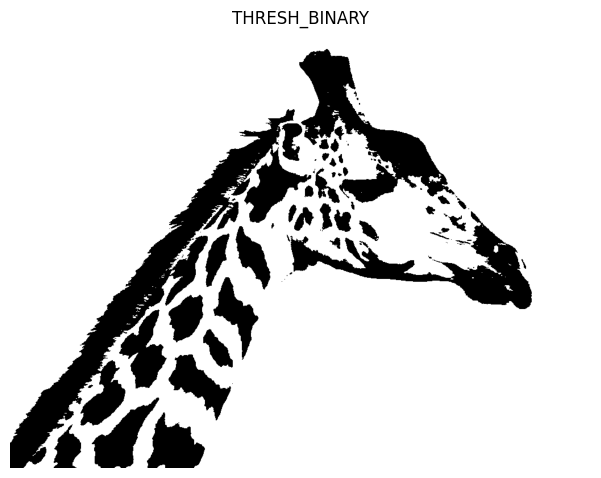

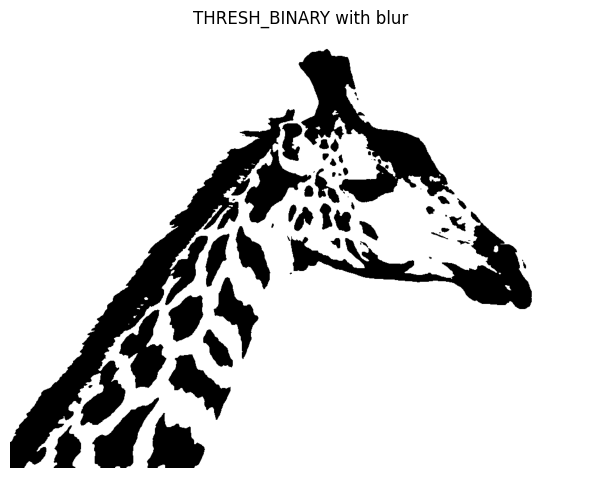

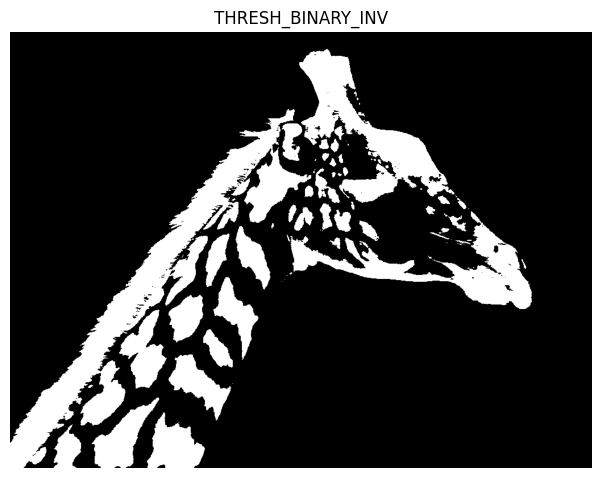

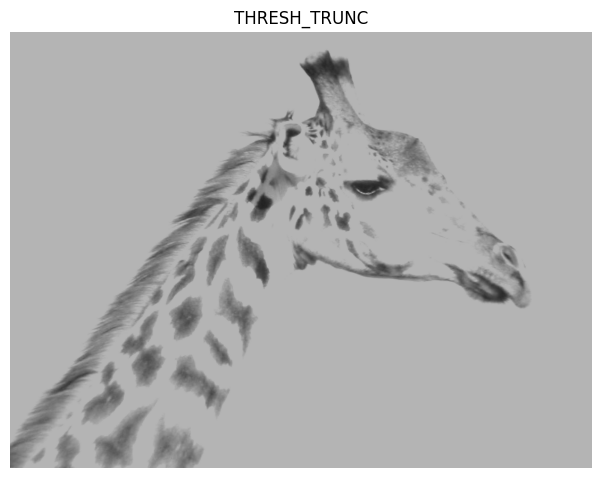

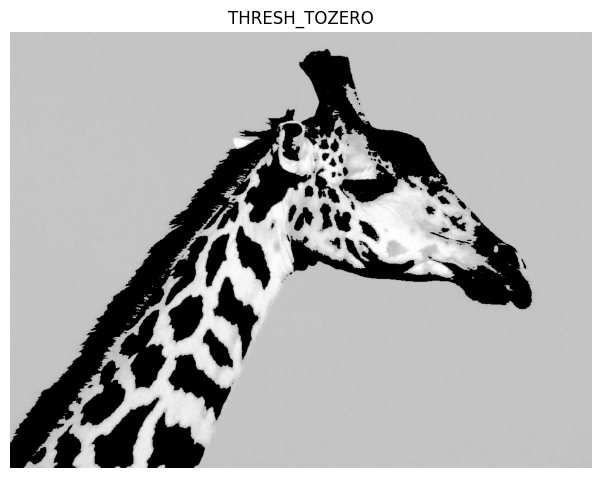

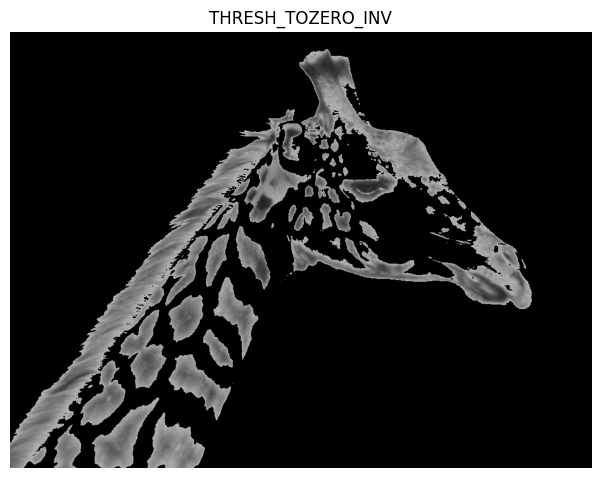

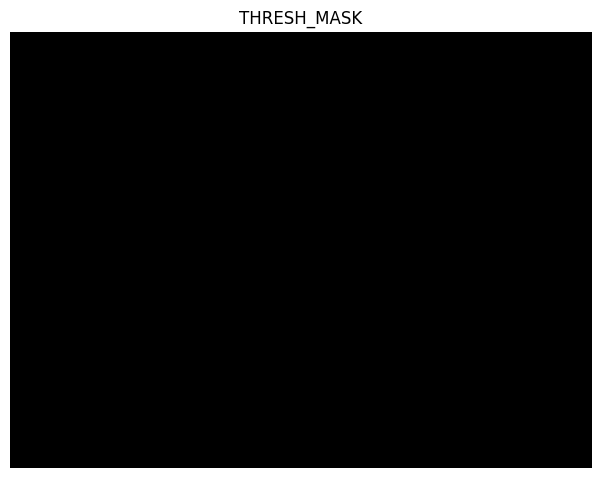

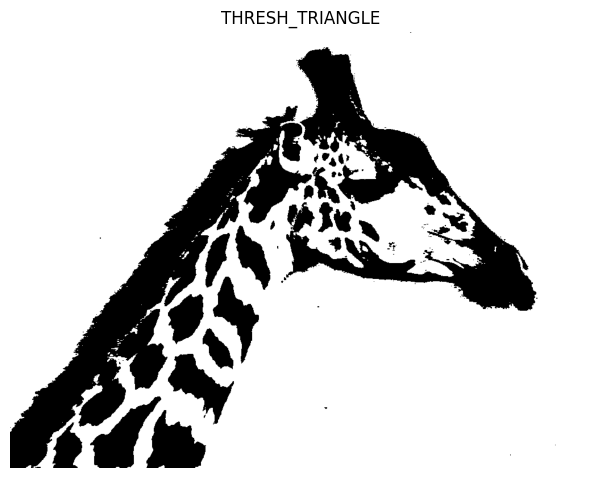

In [78]:
t, t_img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
imshow(t_img, "THRESH_BINARY")

blur = cv2.GaussianBlur(img, (5, 5), 0)
t, t_img = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)
imshow(t_img, "THRESH_BINARY with blur")

t, t_img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)
imshow(t_img, "THRESH_BINARY_INV")

t, t_img = cv2.threshold(img, 180, 255, cv2.THRESH_TRUNC)
imshow(t_img, "THRESH_TRUNC")

t, t_img = cv2.threshold(img, 180, 255, cv2.THRESH_TOZERO)
imshow(t_img, "THRESH_TOZERO")

t, t_img = cv2.threshold(img, 180, 255, cv2.THRESH_TOZERO_INV)
imshow(t_img, "THRESH_TOZERO_INV")

t, t_img = cv2.threshold(img, 180, 255, cv2.THRESH_MASK)
imshow(t_img, "THRESH_MASK")

t, t_img = cv2.threshold(img, 180, 255, cv2.THRESH_TRIANGLE)
imshow(t_img, "THRESH_TRIANGLE")

---
### Adaptive Threshold

Auto finding threshold

Methods:
```python
cv2.ADAPTIVE_THRESH_MEAN_C # Adaptive Thresholding with the mean of neighbourhood area
cv2.THRESH_OTSU  # Otsu's binarization, automatically calculates a threshold value from image histogram for a bimodal image
```

Method to apply:
```python
cv.adaptiveThreshold(image, maxValue, adaptiveMethod, thresholdType, blockSize, C)
```

cv2.adaptiveTheshold - Parameters:
- **src**:	Source 8-bit single-channel image.
- **dst**:	Destination image of the same size and the same type as src.
- **maxValue**:	Non-zero value assigned to the pixels for which the condition is satisfied
- **adaptiveMethod**:	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.
- **thresholdType**:	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.
- **blockSize**:	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- **C**:	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

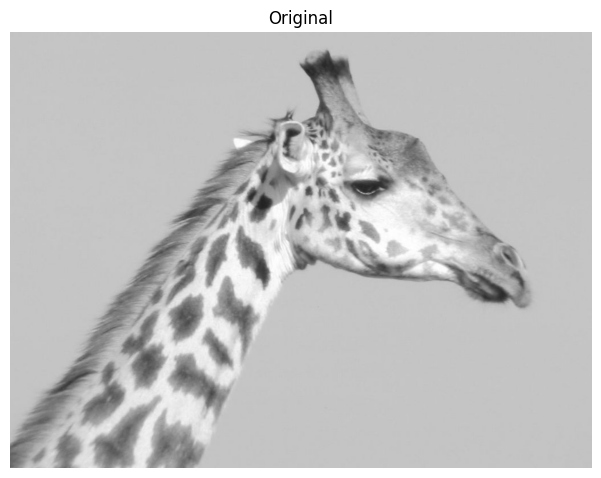

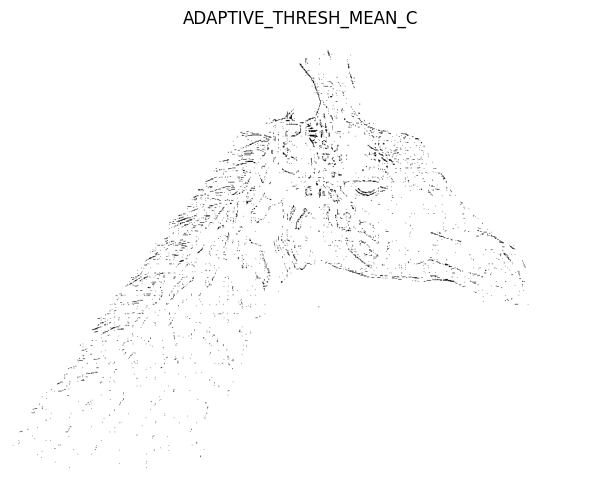

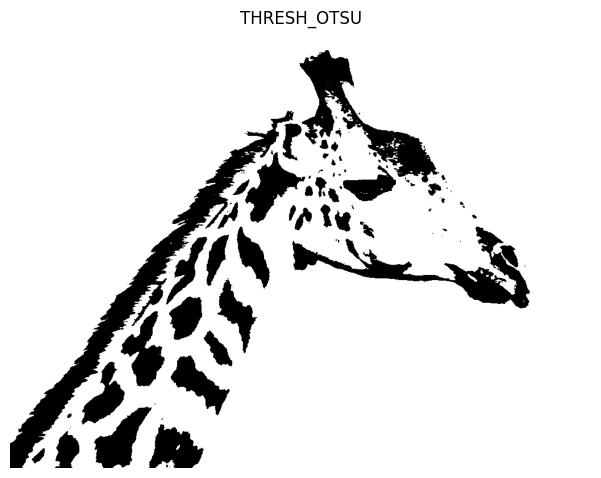

In [66]:
imshow(img, "Original")

t_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
imshow(t_img, "ADAPTIVE_THRESH_MEAN_C")

# t, t_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# imshow(t_img, "THRESH_OTSU")
t, t_img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
imshow(t_img, "THRESH_OTSU")

---
### SkImage Threshold Local

In [68]:
!pip install scikit-image

   ---------------------------------------- 0.0/25.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/25.0 MB 5.3 MB/s eta 0:00:05
    --------------------------------------- 0.5/25.0 MB 5.8 MB/s eta 0:00:05
   - -------------------------------------- 0.8/25.0 MB 6.2 MB/s eta 0:00:04
   - -------------------------------------- 1.1/25.0 MB 6.3 MB/s eta 0:00:04
   -- ------------------------------------- 1.4/25.0 MB 6.5 MB/s eta 0:00:04
   -- ------------------------------------- 1.8/25.0 MB 6.6 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/25.0 MB 6.7 MB/s eta 0:00:04
   --- ------------------------------------ 2.3/25.0 MB 6.9 MB/s eta 0:00:04
   ---- ----------------------------------- 2.6/25.0 MB 6.4 MB/s eta 0:00:04
   ---- ----------------------------------- 2.9/25.0 MB 6.4 MB/s eta 0:00:04
   ----- ---------------------------------- 3.3/25.0 MB 6.5 MB/s eta 0:00:04
   ----- ---------------------------------- 3.6/25.0 MB 6.6 MB/s eta 0:00:04
   ---


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


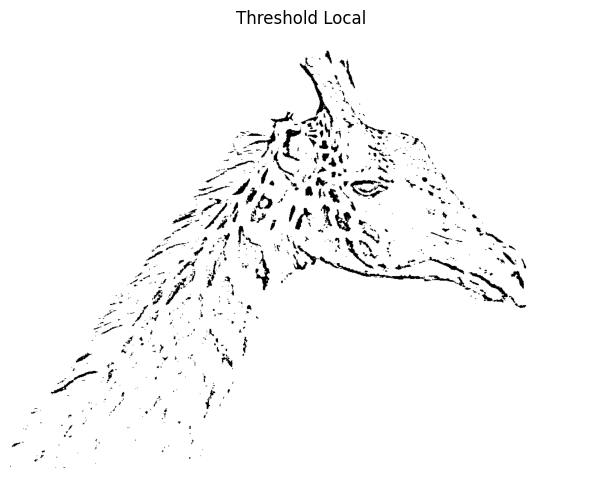

In [75]:
from skimage.filters import threshold_local

img = cv2.imread(IMG_PATH)
V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

t_img = (V > T).astype("uint8")*255
imshow(t_img, "Threshold Local")

---